# Figure 1: Illustrative pathways
In this notebook we highlight three illustrative pathways:
* Type 1: Reaches net zero CO2 and stays constant thereafter
* Type 2: Reaches net zero CO2, and net zero GHG, staying close to net zero GHG afterwards
* Type 3: Reaches net zero CO2, and net zero GHG, and is strongly net-negative thereafter

In [1]:
import pyam 
import matplotlib.pyplot as plt 
from pathlib import Path 
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import string 
plt.style.use("plotting_template.mplstyle")

<IPython.core.display.Javascript object>

# Read in the data
Here, we use the ENGAGE scenarios to plot scenarios of type 1, and SR1.5 data for type 2 and 3.

In [2]:
data_folder = Path("../data")

## Load SR1.5 data for pathway type 2 and 3

In [3]:
df = pyam.IamDataFrame(
    Path(data_folder / "sr15_downselected.xlsx")
)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ../data/sr15_downselected.xlsx
pyam.core - INFO: Reading meta indicators


In [4]:
df.load_meta(
    Path(data_folder / "sr15_updated_meta.xlsx")
)

pyam.core - INFO: Reading meta indicators


## Load ENGAGE data for pathway type 1

In [5]:
df_engage = pyam.IamDataFrame(
    Path(data_folder / "engage_downselected.xlsx")
).filter(
    model = "REMIND*", 
    scenario = "EN_NPi2020_400"
)

pyam.core - INFO: Reading file ../data/engage_downselected.xlsx
pyam.core - INFO: Reading meta indicators


## Construct an aggregated plotting dataframe

In [6]:
plot_data = (
    df
    .filter(scenario = ["SSP1-19", "IMA15*"])
    .append(df_engage)
)

# Plotting

In [7]:
mod_scen_colors = [ 
    ("IMAGE*", "*LiStCh", "#e76562"), 
    ("MESSAGE*", "SSP1-19", "#6abeae"),
    ("REMIND*", "EN_NP*", "#808eaf")
]

In [8]:
def plotting_helper(variable, ax, **kwargs):
    for mod, scen, color in mod_scen_colors:
        plot_data.filter(
            model = mod, 
            scenario = scen, 
            variable = variable
        ).plot(
            ax = ax,
            color = color, 
            **kwargs
        )
    ax.set_title("")

We need to rename the exceedance probability variable to ensure consistency across ENGAGE and SR1.5.

In [9]:
plot_data.rename(
    variable = {
        'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 degC|MAGICC6': 'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6', 
        'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 degC|MAGICC6' : 'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6'
    }, 
    inplace = True 
)

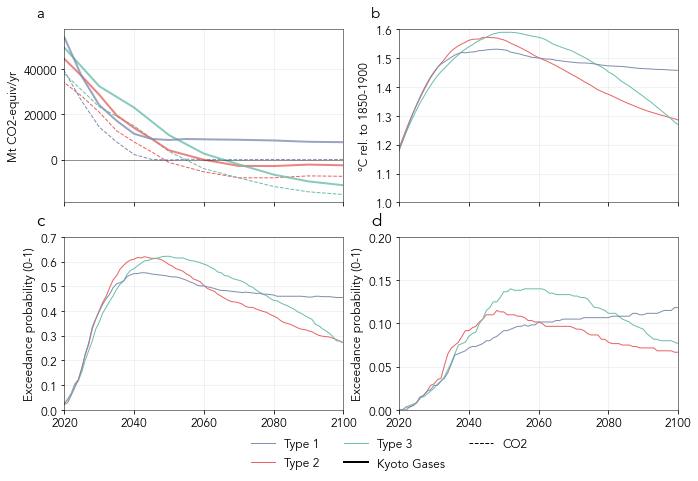

In [10]:
fig, ax = plt.subplots(2,2, sharex=True, figsize=(11,7))

# We first want to plot the CO2 emission profiles in panel A
plotting_helper(
    "Emissions|CO2", 
    ax[0,0], 
    linestyle="dashed"
)

plotting_helper(
    "Emissions|Kyoto Gases", 
    ax[0,0], 
    lw=2, 
    alpha=0.8
)

# We next want to plot the temperature response
plotting_helper(
    "AR5 climate diagnostics|Temperature|Global Mean|MAGICC6|MED", 
    ax[0,1]
)

# Plot the 1.5 deg exceedance probability
plotting_helper(
    'AR5 climate diagnostics|Temperature|Exceedance Probability|1.5 °C|MAGICC6', 
    ax[1,0]
)

plotting_helper(
    'AR5 climate diagnostics|Temperature|Exceedance Probability|2.0 °C|MAGICC6', 
    ax[1,1]
)
ax[1,1].set_ylim(0, 0.2)
ax[1,0].set_ylim(0, 0.7)

# Construct a custom legend
custom_legend = [ 
    Line2D([0], [0], color = "#808eaf",label = "Type 1"), 
    Line2D([0], [0], color = "#e76562",label = "Type 2"), 
    Line2D([0], [0], color = "#6abeae", label = "Type 3"), 
    Line2D([0], [0], color = "black", lw=2, label = "Kyoto Gases"),
    Line2D([0], [0], color = "black", label = "CO2", linestyle = "dashed")
]

# Plot details
ax[0,0].axhline(0, color="black", alpha=0.4)
ax[0,1].set_xlim(2020,2100)
ax[1,0].legend(
    handles=custom_legend, 
    ncol=3,
    bbox_to_anchor=(1.7, -0.1)
)
ax[0,1].set_ylim(1,1.6)

# Add annotations
for n, a in enumerate(ax[0]):
    a.set_xlabel("")
    a.text(
        -0.1, 1.07, 
        string.ascii_lowercase[n], 
        transform=a.transAxes,
        size=15, 
        weight='bold'
    )

for n, a in enumerate(ax[1]):
    a.set_xlabel("")
    a.set_ylabel("Exceedance probability (0-1)")
    a.text(
        -0.1, 1.07, 
        string.ascii_lowercase[n+2], 
        transform=a.transAxes,
        size=17, 
        weight='bold'
    )

# Save the figure

In [11]:
fig.savefig(
    Path("figures/fig1.png")
)